В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error
from sklearn.linear_model import LinearRegression

medical_df = pd.read_csv('medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

X = non_smoker_df['age']
y = non_smoker_df['charges']

In [2]:
def least_square_method(X, y):
    X = np.c_[np.ones((X.shape[0], 1)), X]
    return np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y)

In [3]:
def full_batch_gradient_descent(X, y, lr=None, epochs=None):
    X = np.c_[np.array(X)]
    
    k, b = 0.0, 0.0  # Початкові параметри
    n = len(y)

    errors = []
    for _ in range(epochs):
        y_pred = k * X[:, 0] + b
        error = y - y_pred
        errors.append(np.sum(error))
        
        k_gradient = (2 / n) * np.dot(error, X[:, 0])
        b_gradient = (2 / n) * np.sum(error)
        k = k + lr * k_gradient
        b = b + lr * b_gradient
    
    return k, b, errors

In [4]:
def rmse(y_pred, y):
    return np.sqrt(np.sum(((y_pred - y)**2) / X.shape[0]))

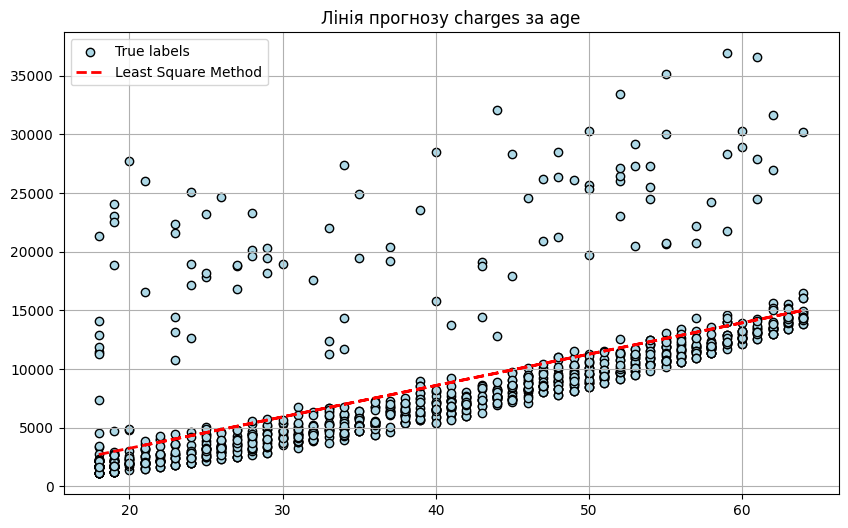

Slope coefficient: 267.24891283119973
Intercept coefficient: -2091.4205565650796
RMSE score: 4662.505766636395


In [5]:
b_least_square, k_least_square = least_square_method(X, y)
y_predicted_with_least_square = k_least_square*X + b_least_square
rmse_least_square = rmse(y_predicted_with_least_square, y)


fig = plt.figure(figsize=(10, 6))
plt.scatter(X, y, edgecolors='black', color='lightblue', label="True labels")
plt.plot(X, y_predicted_with_least_square, color='red', linestyle='dashed', linewidth=2, label="Least Square Method")
plt.title("Лінія прогнозу charges за age")
plt.legend()
plt.grid()
plt.show()

print(f"Slope coefficient: {k_least_square}")
print(f"Intercept coefficient: {b_least_square}")
print(f"RMSE score: {rmse_least_square}")

In [6]:
# перевірка 

print("RMSE score from sklearn: ", root_mean_squared_error(y, y_predicted_with_least_square))
print("RMSE score from function:", rmse(y_predicted_with_least_square, y))

RMSE score from sklearn:  4662.505766636395
RMSE score from function: 4662.505766636395


Функція написана правильно, користуємось нею і надалі

/var/folders/6k/xbj13cx11pb50lk7khv4v7fh0000gp/T/ipykernel_87892/1735628853.py:15: RuntimeWarning: invalid value encountered in scalar add
  k = k + lr * k_gradient


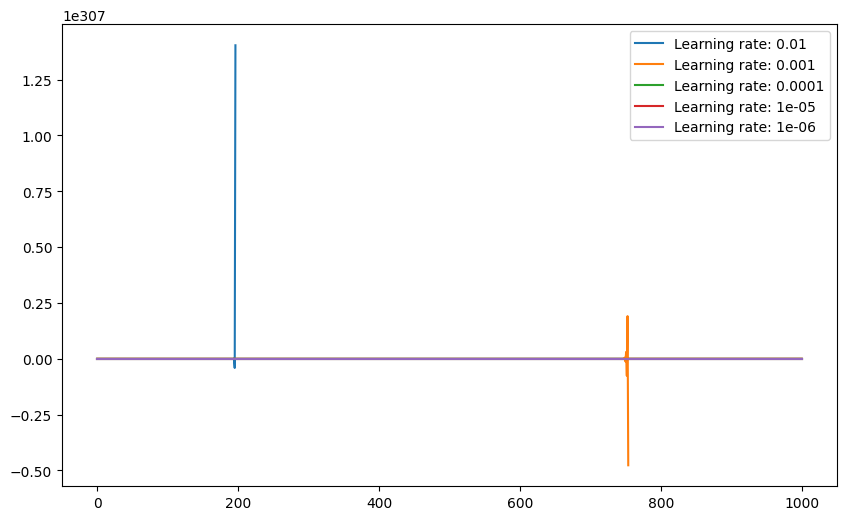

In [7]:
learning_rates = [0.01, 0.001, 0.0001, 0.00001, 0.000001]
results = {}

for learning_rate in learning_rates:
    k, b, errors = full_batch_gradient_descent(X, y, lr=learning_rate, epochs=1000)
    results[learning_rate] = (k, b, errors)

fig = plt.figure(figsize=(10, 6))
for lr, (k, b, losses) in results.items():
    plt.plot(losses, label=f"Learning rate: {lr}")
plt.legend()
plt.show()

На даному етапі бачимо, що значення `0.01` та `0.001` не підходять нам, відкидаємо їх оскільки графік помилки є дуже великим, скоріше за все градієнт "вистрибнув" та пішов в напрямку збільшення

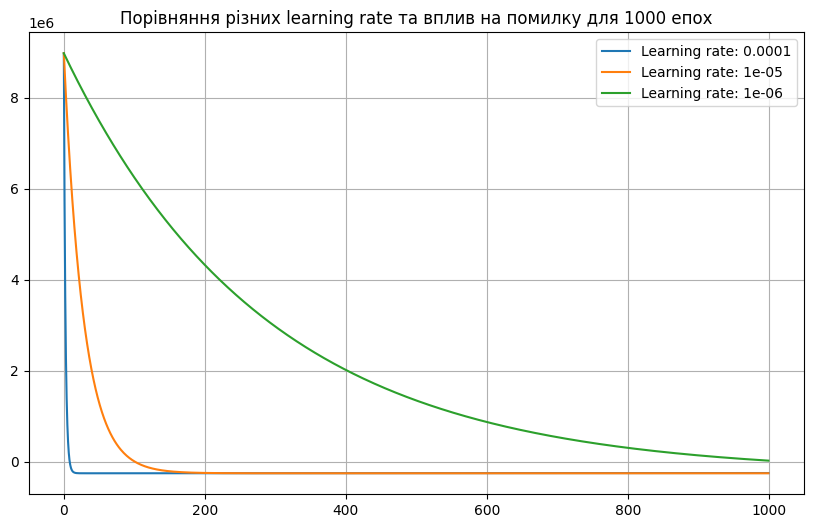

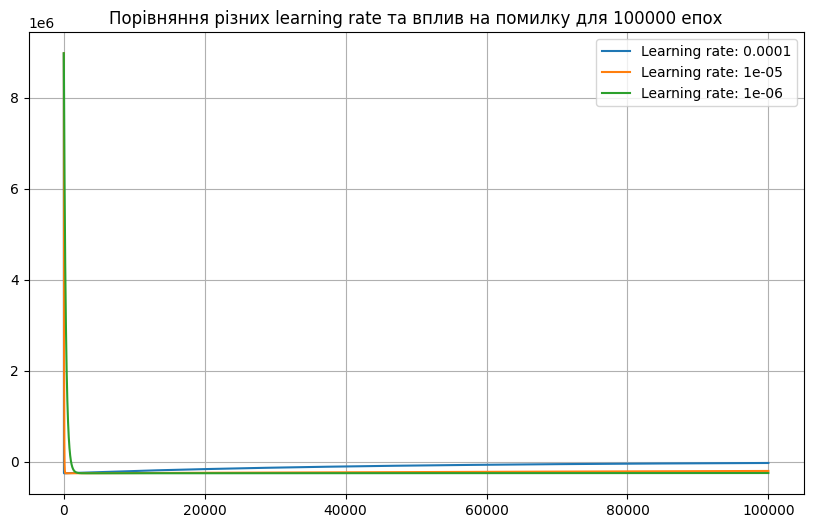

In [8]:
learning_rates = [0.0001, 0.00001, 0.000001]
results = {}

for learning_rate in learning_rates:
    k, b, errors = full_batch_gradient_descent(X, y, lr=learning_rate, epochs=1000)
    results[learning_rate] = (k, b, errors)

fig = plt.figure(figsize=(10, 6))
for lr, (k, b, losses) in results.items():
    plt.plot(losses, label=f"Learning rate: {lr}")
plt.legend()
plt.title("Порівняння різних learning rate та вплив на помилку для 1000 епох")
plt.grid()

results = {}
for learning_rate in learning_rates:
    k, b, errors = full_batch_gradient_descent(X, y, lr=learning_rate, epochs=100000)
    results[learning_rate] = (k, b, errors)

fig = plt.figure(figsize=(10, 6))
for lr, (k, b, losses) in results.items():
    plt.plot(losses, label=f"Learning rate: {lr}")
plt.legend()
plt.title("Порівняння різних learning rate та вплив на помилку для 100000 епох")
plt.grid()
plt.show()

Ситуація стала кращою, в даному випадку мінімальне допустиме значення `learning rate - 0.0001`, оберемо його та збільшимо кількість епох з **1000** до **100000**

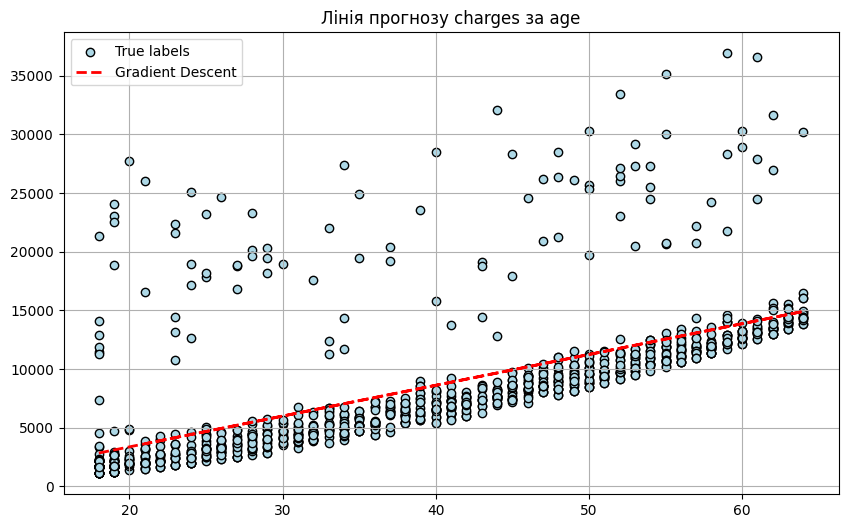

Slope coefficient: 262.34481049895373
Intercept coefficient: -1873.6113407966325
RMSE score: 4663.082007655704


In [9]:
k_gradient_descent = results[0.0001][0]
b_gradient_descent = results[0.0001][1]
y_predicted_with_gradient_descent = k_gradient_descent * X + b_gradient_descent

rmse_gradient_descent = rmse(y, y_predicted_with_gradient_descent)

fig = plt.figure(figsize=(10, 6))
plt.scatter(X, y, edgecolors='black', color='lightblue', label="True labels")
plt.plot(X, y_predicted_with_gradient_descent, color='red', linestyle='dashed', linewidth=2, label="Gradient Descent")
plt.title("Лінія прогнозу charges за age")
plt.legend()
plt.grid()
plt.show()

print(f"Slope coefficient: {k_gradient_descent}")
print(f"Intercept coefficient: {b_gradient_descent}")
print(f"RMSE score: {rmse_gradient_descent}")

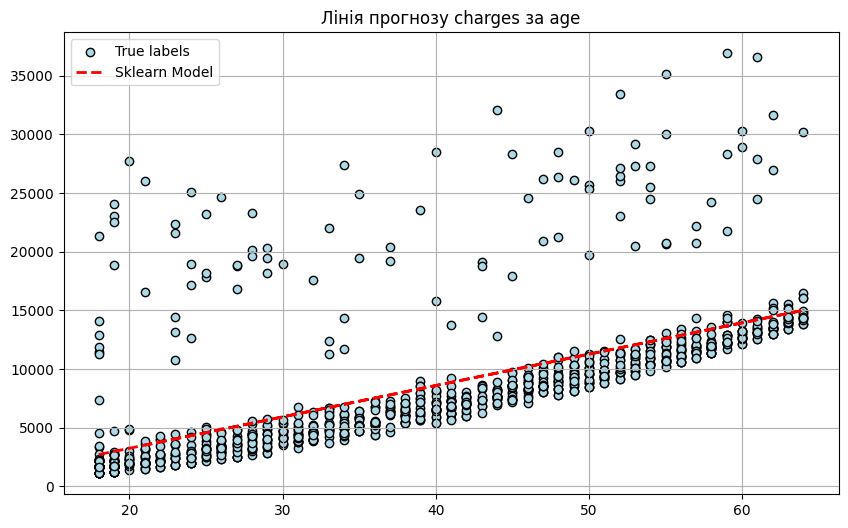

Slope coefficient: 267.248912831198
Intercept coefficient: -2091.420556565021
RMSE score: 4662.505766636395


In [10]:
model = LinearRegression()
model.fit(X.to_frame(), y)
y_predicted_with_sklearn = model.predict(X.to_frame())

rmse_sklearn_model = rmse(y, y_predicted_with_sklearn)

fig = plt.figure(figsize=(10, 6))
plt.scatter(X, y, edgecolors='black', color='lightblue', label="True labels")
plt.plot(X, y_predicted_with_sklearn, color='red', linestyle='dashed', linewidth=2, label="Sklearn Model")
plt.title("Лінія прогнозу charges за age")
plt.legend()
plt.grid()
plt.show()

print(f"Slope coefficient: {model.coef_[0]}")
print(f"Intercept coefficient: {model.intercept_}")
print(f"RMSE score: {rmse_sklearn_model}")

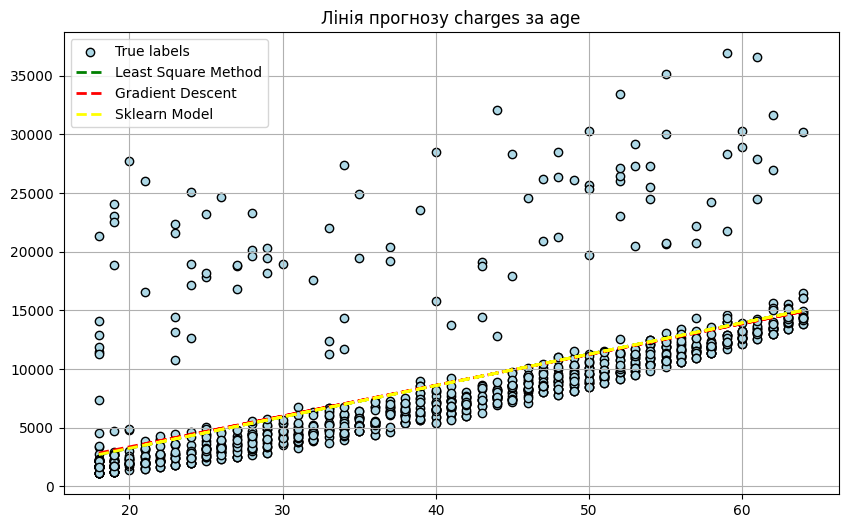

RMSE for least quare method: 4662.505766636395
RMSE for gradient descent: 4663.082007655704
RMSE for sklearn model: 4662.505766636395


In [11]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(X, y, edgecolors='black', color='lightblue', label="True labels")
plt.plot(X, y_predicted_with_least_square, color='green', linestyle='dashed', linewidth=2, label="Least Square Method")
plt.plot(X, y_predicted_with_gradient_descent, color='red', linestyle='dashed', linewidth=2, label="Gradient Descent")
plt.plot(X, y_predicted_with_sklearn, color='yellow', linestyle='dashed', linewidth=2, label="Sklearn Model")
plt.title("Лінія прогнозу charges за age")
plt.legend()
plt.grid()
plt.show()

print(f"RMSE for least quare method: {rmse_least_square}")
print(f"RMSE for gradient descent: {rmse_gradient_descent}")
print(f"RMSE for sklearn model: {rmse_sklearn_model}")

Отже, найменше значення помилки для моделі, обчисленої за допомоги МНК, відповідно sklearn модель також матиме таке ж значення помилки, оскільки використовує МНК. Градієнтний спуск показав практично таке ж значення, можливо доцільно знизити learning rate та збільшити кількість епох, проте для виконання даного завдання обрахованих показників достатньо

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [12]:
smokers_df = medical_df[medical_df.smoker == 'yes']

In [13]:
X_smokers = smokers_df['age']
y_smokers = smokers_df['charges']

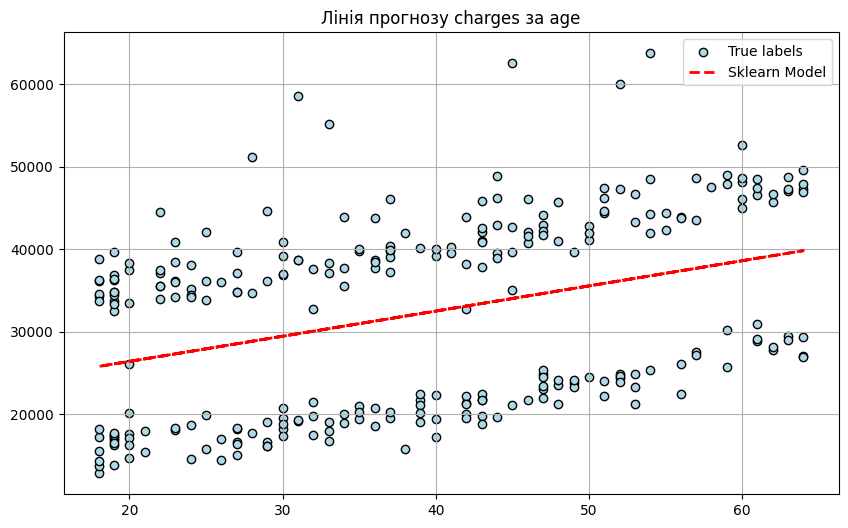

In [14]:
smokers_model = LinearRegression()
smokers_model.fit(X_smokers.to_frame(), y_smokers)
y_smokers_predicted = smokers_model.predict(X_smokers.to_frame())

fig = plt.figure(figsize=(10, 6))
plt.scatter(X_smokers, y_smokers, edgecolors='black', color='lightblue', label="True labels")
plt.plot(X_smokers, y_smokers_predicted, color='red', linestyle='dashed', linewidth=2, label="Sklearn Model")
plt.title("Лінія прогнозу charges за age")
plt.legend()
plt.grid()
plt.show()

In [15]:
print(f"Slope coefficient: {smokers_model.coef_[0]}")
print(f"Intercept coefficient: {smokers_model.intercept_}")
print(f"RMSE: {rmse(y_smokers, y_smokers_predicted)}")
print(f"R2 score: {np.round(100 * r2_score(y_smokers, y_smokers_predicted), 2)}%")

Slope coefficient: 305.23760210982874
Intercept coefficient: 20294.12812691597
RMSE: 5435.438953966095
R2 score: 13.56%


In [16]:
smokers_df.describe()

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


**Висновок:** значення помилки **RMSE=5435.438** для моделі курців є більшим, ніж для моделі не курців. Коефіцієнт детермінації **R<sup>2</sup>=13.56%** що вказує на те, що модель погано наближається до фактичних даних. Бачимо, що лінія йде посередині двох когорт і фактично передбачає лише 3 фактичних значеня. Я вважаю модель недостатньо хорошою, щоб використовувати її в компанії, так як передбачені значення будуть "усереднюватися" та відрізнятися від дійсних. В частині випадків передбачені дані будуть нижчими, в іншій частині вищими.